# Day 24: Planet of Discord

https://adventofcode.com/2019/day/24

## Part 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#infile = "./data/day24test.txt"
infile = "./data/input24.txt"

with open(infile) as f:
    lines = [l.strip('\n') for l in f ]

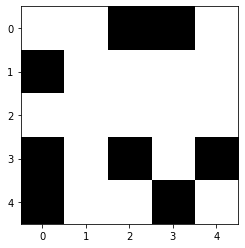

In [6]:
def initLevel(lines,size):
    bugs = np.zeros((size,size))
    for y in range(len(lines)):
        for x in range(len(lines[y])):
            if lines[y][x]=='.': 
                bugs[y][x]=0
            else:
                bugs[y][x]=1
    return bugs

bugs = initLevel(lines,5)
plt.imshow(bugs, cmap='binary')
plt.show()

In [7]:
def survivalOld(y,x,area):
    # Each minute, The bugs live and die based on the number of bugs in the four adjacent tiles:
    # A bug dies (becoming an empty space) unless there is exactly one bug adjacent to it.
    # An empty space becomes infested with a bug if exactly one or two bugs are adjacent to it.
    neighbours = 0
    if x==0:
        if y==0:
            neighbours = area[y,x+1] + area[y+1,x]
        elif y==len(area)-1:
            neighbours = area[y-1,x] + area[y,x+1]
        else:
            neighbours = area[y,x+1] + area[y-1,x] + area[y+1,x]
    elif x==len(area[0])-1:
        if y==0:
            neighbours = area[y,x-1] + area[y+1,x]
        elif y==len(area)-1:
            neighbours = area[y-1,x] + area[y,x-1]
        else:
            neighbours = area[y,x-1] + area[y-1,x] + area[y+1,x]   
    else:
        if y==0:
            neighbours = area[y,x-1] + area[y,x+1] + area[y+1,x]   
        elif y==len(area)-1:
            neighbours = area[y,x-1] + area[y,x+1] + area[y-1,x]
        else:
            neighbours = area[y,x-1] + area[y,x+1] + area[y-1,x] + area[y+1,x]
    if area[y,x]==1 and neighbours!=1:
        return 0
    elif area[y,x]==0 and ( neighbours==1 or neighbours==2 ):
        return 1
    else:
        return area[y,x]

def survival(y,x,area):
    # Add empty borders to ease neighbours check
    borders = np.zeros((area.shape[0]+2,area.shape[1]+2))
    borders[1:area.shape[0]+1,1:area.shape[1]+1] = area
    xb = x+1
    yb = y+1
    neighbours = borders[yb,xb-1] + borders[yb,xb+1] + borders[yb-1,xb] + borders[yb+1,xb]
    if area[y,x]==1 and neighbours!=1:
        return 0
    elif area[y,x]==0 and ( neighbours==1 or neighbours==2 ):
        return 1
    else:
        return area[y,x]
    
def evolve(area):
    newarea = np.copy(area)
    # Apply the survival function to every cell in the area
    for y in range(area.shape[0]):
        for x in range(area.shape[1]):
            newarea[y,x] = survival(y,x,area)
    return newarea

def bugsBiodiversity(area):
    temp = area.reshape(area.shape[0]*area.shape[1])
    temp = temp[::-1]
    return int(temp.dot(2**np.arange(temp.size)[::-1]))

Found duplicate state!
Biodiversity = 19923473


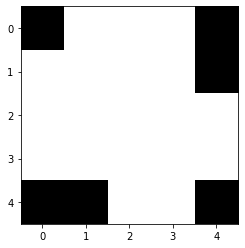

In [8]:
bughash = []
bughash.append(bugsBiodiversity(bugs))

h = 0
while(True):
    bugs = evolve(bugs)
    h = bugsBiodiversity(bugs)
    if h in bughash:
        print("Found duplicate state!")
        break
    else:
        bughash.append(h)

print("Biodiversity =",h)
plt.imshow(bugs, cmap='binary')
plt.show()

## Part 2

Umpf, recursion. I began with the idea of building a class for each level, but this is likely overkill. It's probably easier and faster to build a _large_ number of empty levels up and down (How large? Probably of the order of the iteration cycles * 2, assuming that at each cycle only a new level is filled up and down: given the rule of replication of the bugs, it seems a correct assumption). Of course I also need to rebuild the evolution method to properly count all adiacent cells up and down the level ladder, at least for those cells neigbouring the center or at the border.

In [9]:
def PlotLevels(levels,nplots=1):
    nlevel = (len(levels)-1)//2
    fig = plt.figure(figsize=(12,4), dpi=100)
    for i in range(nplots):
        plt.subplot(1,nplots,i+1)
        ilevel = nlevel-nplots//2+i
        rlevel = ilevel-nlevel
        f = plt.imshow(levels[ilevel],cmap='binary')
        f.axes.set_title(str(rlevel))
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

#PlotLevels(levels,9)

In [10]:
def isEmpty(level):
    return not level.sum()

def survivalLevel(x,y,level,levels):
    area = np.copy(levels[level])
    ldw = np.copy(levels[level+1]) # level within the current level
    lup = np.copy(levels[level-1]) # level surrounding the current level
    
    # Add borders to ease neighbours check
    borders = np.zeros((7,7))
    borders[1:6,1:6] = area
    # Fill with upper level content
    if not isEmpty(lup):
        borders[0,:] = lup[1,2]
        borders[6,:] = lup[3,2]
        borders[:,0] = lup[2,1]
        borders[:,6] = lup[2,3]
    # Fill center with 0, to be used in case lower level is empty
    borders[3:3] = 0
    
    neighbours = 0
    xb = x+1
    yb = y+1
    X = (x,y)
    if X==(2,2):
        print("You should not check the center tile!")
    elif X==(2,1) or X==(1,2) or X==(3,2) or X==(2,3):
        # For tiles around center (2,1) (1,2) (3,2) (2,3) I should also count neigbours from deeper level
        if isEmpty(ldw):
            neighbours = borders[yb,xb-1] + borders[yb,xb+1] + borders[yb-1,xb] + borders[yb+1,xb]
        else:
            if   X==(2,1): 
                neighbours = borders[yb,xb-1] + borders[yb,xb+1] + borders[yb-1,xb] + ldw[0,:].sum()
            elif X==(1,2):
                neighbours = borders[yb,xb-1] + ldw[:,0].sum() + borders[yb-1,xb] + borders[yb+1,xb]
            elif X==(3,2):
                neighbours = ldw[:,4].sum() + borders[yb,xb+1] + borders[yb-1,xb] + borders[yb+1,xb]
            elif X==(2,3):
                neighbours = borders[yb,xb-1] + borders[yb,xb+1] + ldw[4,:].sum() + borders[yb+1,xb]
    else:
        # standard neigbour counting works for outer rim since I filled the borders with outer level values,
        # and for inner cells (1,1), (3,1), (1,3), (3,3)
        neighbours = borders[yb,xb-1] + borders[yb,xb+1] + borders[yb-1,xb] + borders[yb+1,xb]
    
    if area[y,x]==1 and neighbours!=1:
        return 0
    elif area[y,x]==0 and ( neighbours==1 or neighbours==2 ):
        return 1
    else:
        return area[y,x]
    
def evolveLevel(level,levels):
    newarea = np.copy(levels[level])
    for y in range(5):
        for x in range(5):
            if x==2 and y==2: # skip center
                continue
            newarea[y,x] = survivalLevel(x,y,level,levels)
    return newarea

def evolveLevels(levels):
    newlevels = list(levels)
    for i in range(1,len(levels)-1):
        if isEmpty(levels[i-1]) and isEmpty(levels[i]) and isEmpty(levels[i+1]):
            continue
        else:
            newlevel = evolveLevel(i,levels)
            newlevels[i] = np.copy(newlevel)
    return newlevels

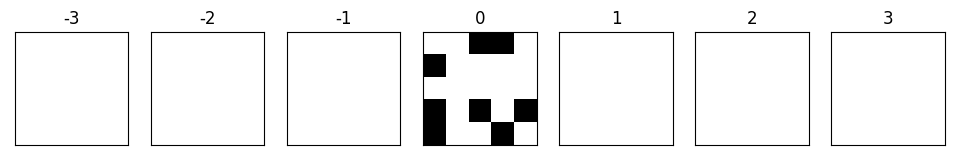

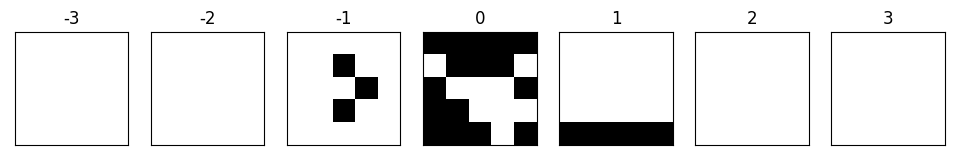

In [11]:
def initializeLevels(lines,size=5,nlevel=200):
    # initialize first level
    L0 = initLevel(lines,5)
    # pregenerate empty levesl up and down
    empty = np.zeros((size,size))
    levels = []
    for l in range( 2*nlevel+1 ):
        levels.append(np.copy(empty))
    # set central level
    levels[nlevel] = np.copy(L0)
    return levels

# Evolution
# A bug dies (becoming an empty space) unless there is exactly one bug adjacent to it.
# An empty space becomes infested with a bug if exactly one or two bugs are adjacent to it.
levels = initializeLevels(lines,5,200)
newlevels = evolveLevels(levels)
PlotLevels(levels,7)
PlotLevels(newlevels,7)

In [12]:
def countBugs(levels):
    bugs = 0
    for l in levels:
        bugs += l.sum()
    return int(bugs)

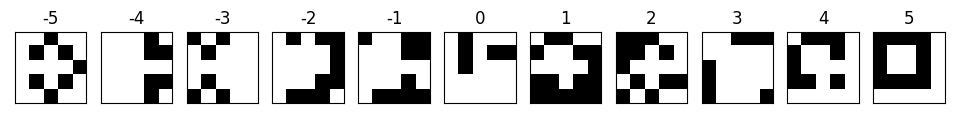

Number of bugs after 10 minutes =  99


In [13]:
# Test recursive salgorithm with example

infile = "./data/day24test.txt"
with open(infile) as f:
    lines = [l.strip('\n') for l in f ]

i = 0
imax = 10
levels = initializeLevels(lines,5,200)
while True:
    newlevels = evolveLevels(levels)
    i+=1
    levels = list(newlevels)
    if i==imax:
        break
        
PlotLevels(levels,11)
print("Number of bugs after",imax,"minutes = ",countBugs(levels))

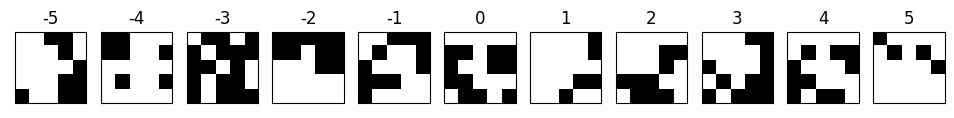

Number of bugs after 200 minutes =  1902


In [14]:
# Now the real thing

infile = "./data/input24.txt"
with open(infile) as f:
    lines = [l.strip('\n') for l in f ]

i = 0
imax = 200
levels = initializeLevels(lines,5,250)
while True:
    newlevels = evolveLevels(levels)
    i+=1
    levels = list(newlevels)
    if i==imax:
        break
        
PlotLevels(levels,11)
print("Number of bugs after",imax,"minutes = ",countBugs(levels))

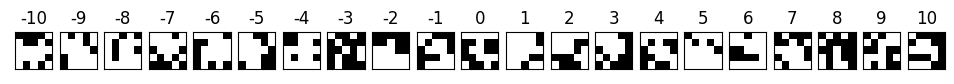

In [15]:
PlotLevels(levels,21)